# Introduction to Curve Fitting

Curve fitting is a type of optimization that finds a curve, expressed as a mathematical function, which best approximates a series of data points. This method is widely used in various scientific and engineering fields to model relationships between variables and analyze experimental data. In physics, curve fitting can help us understand underlying principles, validate theories, and predict future observations.


# Theoretical Background

## Polynomial Functions

A polynomial function is a mathematical expression consisting of variables, coefficients, and exponents, combined using only addition, subtraction, multiplication, and non-negative integer exponentiation. The general form of a polynomial of degree \(n\) is:

\[
P(x) = a_n x^n + a_{n-1} x^{n-1} + \dots + a_2 x^2 + a_1 x + a_0
\]

where \(a_n, a_{n-1}, \ldots, a_0\) are coefficients, and \(n\) is the degree of the polynomial. In curve fitting, we often try to find the polynomial that best fits our data, aiming to minimize the difference between the observed data points and the values predicted by the polynomial.

## Power Laws

A power law is a type of algebraic relationship that describes phenomena where one quantity varies as a power of another. It is expressed as:

\[
y = ax^b
\]

where \(a\) and \(b\) are constants. Power laws are ubiquitous in physics, representing relationships in areas ranging from astrophysics to quantum mechanics. When fitting data to a power law, we often transform the equation into a linear form to simplify the fitting process.


# Data Generation

## Generating Synthetic Data for Polynomial Fitting

Generate a dataset with a quadratic relationship: \(y = ax^2 + bx + c + \text{noise}\). We'll use this dataset to demonstrate polynomial curve fitting.


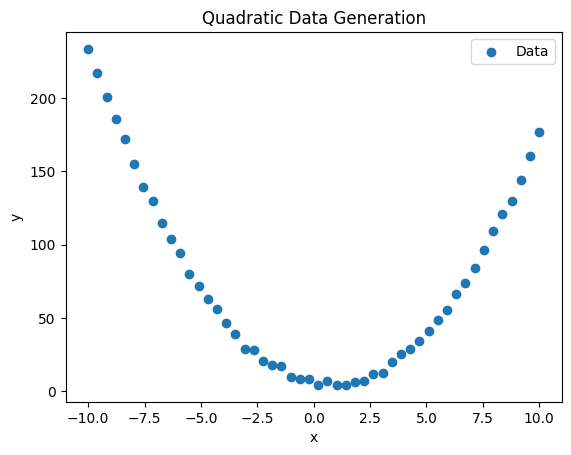

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the quadratic function y = ax^2 + bx + c
a, b, c = 2, -3, 5

# Generate x values
x_values = np.linspace(-10, 10, 50)

# Generate y values with added Gaussian noise
noise = np.random.normal(0, 2, x_values.shape)
y_values = a * x_values**2 + b * x_values + c + noise

# Plot the generated data
plt.scatter(x_values, y_values, label='Data')
plt.title('Quadratic Data Generation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## Generating Synthetic Data for Power Law Fitting

Generate a dataset following a power law: \(y = ax^b + \text{noise}\). This dataset will illustrate how to perform power-law fitting.


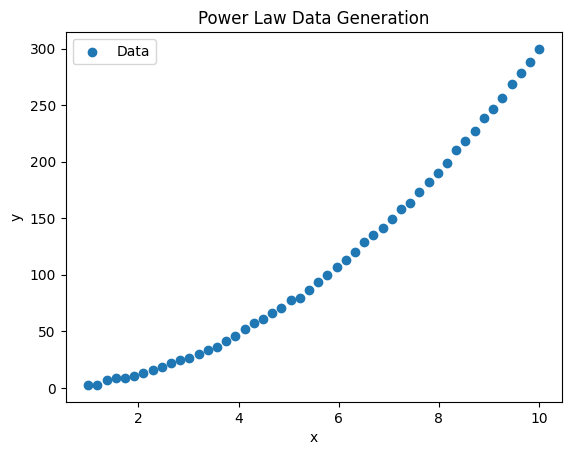

In [2]:
# Power law parameters
a, b = 3, 2

# Generate x values (positive to avoid issues with negative numbers raised to powers)
x_values_power = np.linspace(1, 10, 50)

# Generate y values with added Gaussian noise
noise_power = np.random.normal(0, 1, x_values_power.shape)
y_values_power = a * x_values_power**b + noise_power

# Plot the generated data
plt.scatter(x_values_power, y_values_power, label='Data')
plt.title('Power Law Data Generation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Polynomial Fitting

Fit the generated quadratic data to a polynomial model using `numpy.polyfit` and evaluate the fit by plotting the results.


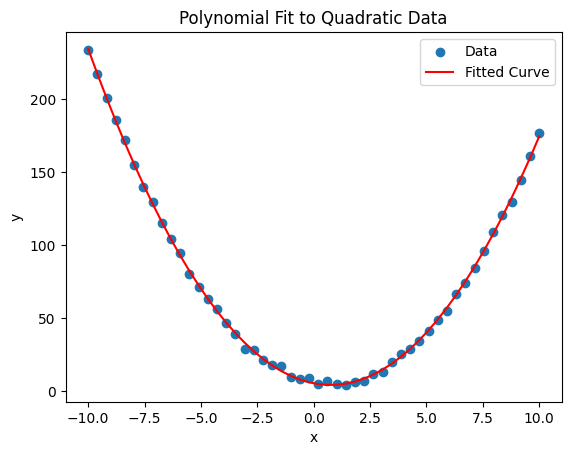

In [3]:
# Fit the data to a quadratic polynomial (degree 2)
coefficients = np.polyfit(x_values, y_values, 2)

# Create a polynomial function using the fitted coefficients
p = np.poly1d(coefficients)

# Generate y values using the polynomial function
y_fit = p(x_values)

# Plot the original data and the fitted curve
plt.scatter(x_values, y_values, label='Data')
plt.plot(x_values, y_fit, color='red', label='Fitted Curve')
plt.title('Polynomial Fit to Quadratic Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Power Law Fitting (Using `curve_fit`)

Utilize `scipy.optimize.curve_fit` to perform power-law fitting, which provides a more robust and general approach for non-linear models compared to polynomial fitting.


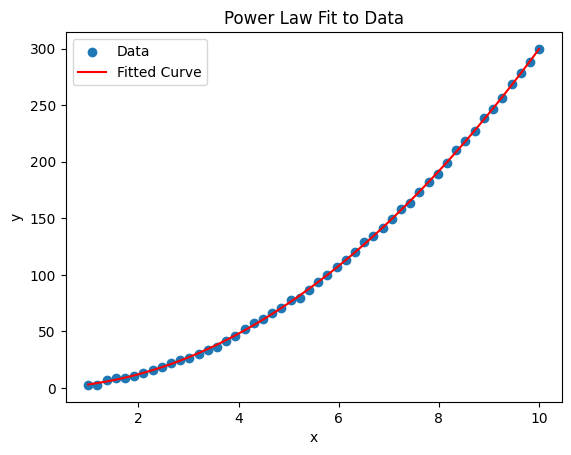

In [4]:
from scipy.optimize import curve_fit

# Define the power-law function
def power_law(x, a, b):
    return a * x**b

# Use curve_fit to find the best fit parameters for the power-law model
params, covariance = curve_fit(power_law, x_values_power, y_values_power)

# Generate y values using the fitted model
y_fit_power = power_law(x_values_power, *params)

# Plot the original data and the fitted curve
plt.scatter(x_values_power, y_values_power, label='Data')
plt.plot(x_values_power, y_fit_power, color='red', label='Fitted Curve')
plt.title('Power Law Fit to Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



# Illustrating Overfitting with Polynomial Fits

It's crucial to select a model that not only fits the current data well but also generalizes to new data. Fitting a polynomial to our data might tempt us to use a high-degree polynomial to get the lowest possible error on our training data. However, this can lead to overfitting, where the model begins to capture the noise as if it were a true signal. This section demonstrates overfitting by fitting polynomials of increasing degrees to our data and observing the effects.


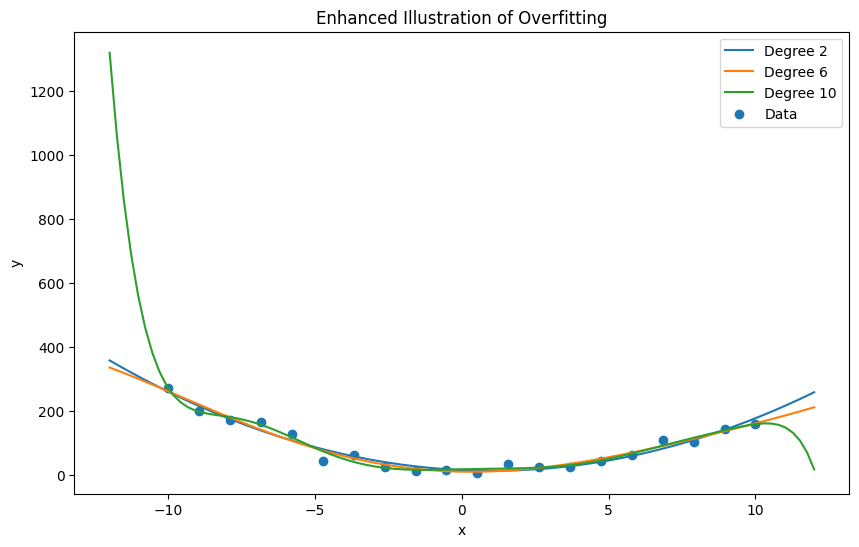

In [5]:
# Regenerate the quadratic dataset
np.random.seed(0)  # Seed for reproducibility
x_overfit = np.linspace(-10, 10, 30)  # Fewer points to accentuate the effect of noise
y_overfit = 2 * x_overfit**2 - 3 * x_overfit + 5 + np.random.normal(0, 10, x_overfit.shape)

# Fit polynomials of degree
degrees = [2, 5, 15]
plt.figure(figsize=(10, 6))

for degree in degrees:
    coefficients = np.polyfit(x_overfit, y_overfit, degree)
    p = np.poly1d(coefficients)
    y_fit_overfit = p(x_overfit)

    plt.plot(x_overfit, y_fit_overfit, label=f'Degree {degree}')

# Plot the original data
plt.scatter(x_overfit, y_overfit, label='Data')
plt.title('Illustration of Overfitting')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Conclusion

In this notebook, we explored the fundamentals of curve fitting, an essential tool in physics and engineering for analyzing and modeling data. We started with polynomial fitting, utilizing NumPy's `polyfit` for a straightforward quadratic relationship, ideal for beginners and simple datasets.

We then advanced to power law fitting, employing `scipy.optimize.curve_fit`, a more versatile tool capable of handling complex, non-linear relationships. Through these examples, we learned how to generate synthetic datasets, apply different fitting techniques, and interpret the resulting models.

Understanding these fitting procedures and their applications is crucial for analyzing experimental data, validating theoretical models, and predicting future trends in various scientific and engineering fields.


# Exercises

1. **Linear Fit**: Generate a linear dataset (you can use a similar approach as with the quadratic data) and fit it using both NumPy's `polyfit` (with degree 1) and `scipy.optimize.curve_fit`. Compare the results.

2. **Polynomial Degree Exploration**: Using the quadratic dataset, experiment with fitting polynomials of different degrees (e.g., linear, cubic, quartic). Plot these fits and discuss how the choice of the polynomial degree affects the fit quality.

3. **Logarithmic Fit**: Generate a dataset that follows a logarithmic trend (e.g., \(y = a\log(x) + b\)) and use `curve_fit` to fit the data. Analyze the fit quality and discuss its potential applications.

4. **Exponential Decay**: Simulate a dataset representing exponential decay (common in radioactive decay processes) and fit it using `curve_fit`. Discuss how well the exponential model represents the data and potential implications for physics experiments.

5. **Data Analysis Challenge**: Find a real-world dataset online that you suspect follows a certain mathematical relationship. Attempt to fit this data using an appropriate model and analyze your findings.
